In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
!pip install -U seaborn
import seaborn as sns

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 286kB 16.0MB/s eta 0:00:01
  Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0
     |████████████████████████████████| 112kB 23.5MB/s eta 0:00:01
Folium installed
Libraries imported.


<div class='alert alert-info'>
<h3><center> Ecco restaurant marketing analysis</center></h3>
</div>

In [ ]:
# Deleted the credentials after running the code

<div class='alert alert-info'>
<h3><center> Finding the popular places near Eeco restaurant</center></h3>
</div>

In [5]:
latitude = 40.715337
longitude = -74.008848
radius = 1000

In [6]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=YS0GFJQCQJVV2RMFUYWM4KJMS3MMG1WHQHKCC4EV2NY4CSAO&client_secret=0JNASXX4UL5WAIK4B4SFYQ22X4URA54EL1AHN5QJBRHK53GY&ll=40.715337,-74.008848&v=20180604&radius=1000&limit=30'

In [7]:
results = requests.get(url).json()
'There are {} around Ecco restaurant.'.format(len(results['response']['groups'][0]['items']))

'There are 30 around Ecco restaurant.'

In [9]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4af5d65ff964a52091fd21e3',
  'name': 'Korin',
  'location': {'address': '57 Warren St',
   'crossStreet': 'Church St',
   'lat': 40.71482437714839,
   'lng': -74.00940425461492,
   'labeledLatLngs': [{'label': 'display',
     'lat': 40.71482437714839,
     'lng': -74.00940425461492},
    {'label': 'entrance', 'lat': 40.714727, 'lng': -74.009399}],
   'distance': 73,
   'postalCode': '10007',
   'cc': 'US',
   'neighborhood': 'Tribeca',
   'city': 'New York',
   'state': 'NY',
   'country': 'United States',
   'formattedAddress': ['57 Warren St (Church St)',
    'New York, NY 10007',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d1f8941735',
    'name': 'Furniture / Home Store',
    'pluralName': 'Furniture / Home Stores',
    'shortName': 'Furniture / Home',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/cate

In [10]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']

    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  del sys.path[0]


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,id
0,Korin,Furniture / Home Store,57 Warren St,Church St,40.714824,-74.009404,"[{'label': 'display', 'lat': 40.71482437714839...",73,10007,US,Tribeca,New York,NY,United States,"[57 Warren St (Church St), New York, NY 10007,...",4af5d65ff964a52091fd21e3
1,Los Tacos No. 1,Taco Place,136 Church St,NaN,40.714267,-74.008756,"[{'label': 'display', 'lat': 40.714267, 'lng':...",119,10007,US,NaN,New York,NY,United States,"[136 Church St, New York, NY 10007, United Sta...",5d5f24ec09484500079aee00
2,Lekka Burger,Burger Joint,81 Warren St,btw Greenwich & West Broadway,40.715246,-74.010559,"[{'label': 'display', 'lat': 40.715246, 'lng':...",144,10007,US,NaN,New York,NY,United States,"[81 Warren St (btw Greenwich & West Broadway),...",5dc6f6a5ea8dfb00080f6faa
3,Heyday,Spa,92 Reade St,NaN,40.715726,-74.007767,"[{'label': 'display', 'lat': 40.715726, 'lng':...",100,10013,US,NaN,New York,NY,United States,"[92 Reade St, New York, NY 10013, United States]",57ad129c498e05b086594d72
4,Takahachi Bakery,Bakery,25 Murray St,at Church St,40.713653,-74.008804,"[{'label': 'display', 'lat': 40.71365284530189...",187,10007,US,NaN,New York,NY,United States,"[25 Murray St (at Church St), New York, NY 100...",4c154c9a77cea593c401d260
5,Chambers Street Wines,Wine Shop,148 Chambers St,btwn West Broadway & Hudson St,40.715773,-74.009718,"[{'label': 'display', 'lat': 40.71577306392837...",88,10007,US,NaN,New York,NY,United States,[148 Chambers St (btwn West Broadway & Hudson ...,4adcf23cf964a520cc6221e3
6,Philip Williams Posters,Antique Shop,122 Chambers St,NaN,40.715284,-74.008781,"[{'label': 'display', 'lat': 40.71528423132827...",8,10007,US,NaN,New York,NY,United States,"[122 Chambers St, New York, NY 10007, United S...",4b747291f964a52042dd2de3
7,Juice Press,Vegetarian / Vegan Restaurant,83 Murray St,btwn Greenwich St & W Broadway,40.714788,-74.011132,"[{'label': 'display', 'lat': 40.71478769908051...",202,10007,US,NaN,New York,NY,United States,[83 Murray St (btwn Greenwich St & W Broadway)...,54148bc6498ea7bb8c05b70a
8,Babesta,Baby Store,56 Warren Street,btw West Broadway & Church,40.714760,-74.009280,"[{'label': 'display', 'lat': 40.71476, 'lng': ...",73,10007,US,NaN,New York,NY,United States,[56 Warren Street (btw West Broadway & Church)...,4cc368704fcfbfb70a0cbe24
9,Washington Market Park,Playground,Greenwich St,at Reade St,40.717046,-74.011095,"[{'label': 'display', 'lat': 40.71704598853704...",268,NaN,US,NaN,New York,NY,United States,"[Greenwich St (at Reade St), New York, NY, Uni...",4a9bcc2ff964a5203b3520e3


<div class='alert alert-info'>
<h3><center> EDA</center></h3>
</div>

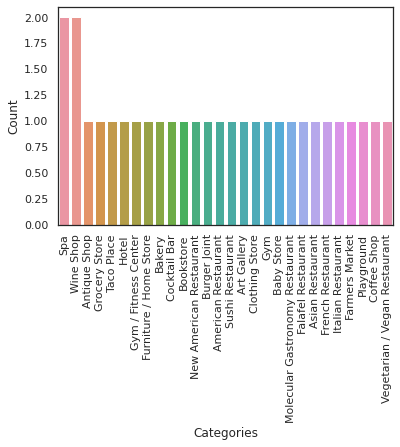

In [42]:
cat_data=pd.DataFrame(dataframe_filtered['categories'].value_counts().reset_index())
ax=sns.barplot(x="index",y="categories",data=cat_data)
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.xlabel("Categories")
plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance', ylabel='Density'>

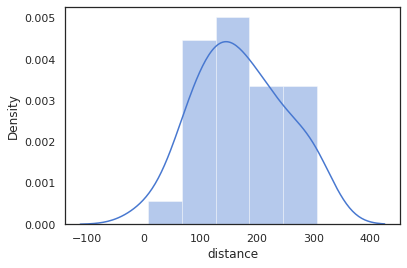

In [43]:
sns.distplot(dataframe_filtered['distance'])

<div class='alert alert-info'>
<h3><center> Geo-spatial analysis od the popular places near Eeco</center></h3>
</div>

In [14]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ecco',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

In [15]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Korin,Furniture / Home Store,40.714824,-74.009404
1,Los Tacos No. 1,Taco Place,40.714267,-74.008756
2,Lekka Burger,Burger Joint,40.715246,-74.010559
3,Heyday,Spa,40.715726,-74.007767
4,Takahachi Bakery,Bakery,40.713653,-74.008804


In [ ]:
<div class='alert alert-info'>
<h3><center>K-Means clustering</center></h3>
</div>

In [16]:
# set number of clusters
from sklearn.cluster import KMeans
kclusters = 5

manhattan_grouped_clustering = nearby_venues.drop(columns=['name','categories'])

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 4, 1, 3, 0, 0, 4, 0, 2], dtype=int32)

In [17]:
# add clustering labels
nearby_venues.insert(0, 'Cluster Labels', kmeans.labels_)

In [18]:
nearby_venues.head()

,Cluster Labels,name,categories,lat,lng
0,0,Korin,Furniture / Home Store,40.714824,-74.009404
1,0,Los Tacos No. 1,Taco Place,40.714267,-74.008756
2,4,Lekka Burger,Burger Joint,40.715246,-74.010559
3,1,Heyday,Spa,40.715726,-74.007767
4,3,Takahachi Bakery,Bakery,40.713653,-74.008804


In [19]:
# create map
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=14,
    popup='Ecco',
    fill=True,
    color='blue',
    fill_color='blue',
    fill_opacity=0.6
    ).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name'], nearby_venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [20]:
dataframe.rename(columns={'venue.name':'name','venue.id':'venue_id'},inplace=True)
nearby_venues=nearby_venues.merge(dataframe[['name','venue_id']],on='name',how='left')
nearby_venues.head()

,Cluster Labels,name,categories,lat,lng,venue_id
0,0,Korin,Furniture / Home Store,40.714824,-74.009404,4af5d65ff964a52091fd21e3
1,0,Los Tacos No. 1,Taco Place,40.714267,-74.008756,5d5f24ec09484500079aee00
2,4,Lekka Burger,Burger Joint,40.715246,-74.010559,5dc6f6a5ea8dfb00080f6faa
3,1,Heyday,Spa,40.715726,-74.007767,57ad129c498e05b086594d72
4,3,Takahachi Bakery,Bakery,40.713653,-74.008804,4c154c9a77cea593c401d260


<div class='alert alert-info'>
<h3><center> Getting the ratings for all the popular places</center></h3>
</div>

In [22]:
def get_venue_rating(venue_id):
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
    result = requests.get(url).json()
    try:
        return result['response']['venue']['rating']
    except:
        return np.nan
nearby_venues['rating']=0
for i in range(0,len(nearby_venues)):
    nearby_venues['rating'].iloc[i]=get_venue_rating(nearby_venues['venue_id'].iloc[i])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [23]:
nearby_venues

,Cluster Labels,name,categories,lat,lng,venue_id,rating
0,0,Korin,Furniture / Home Store,40.714824,-74.009404,4af5d65ff964a52091fd21e3,9.2
1,0,Los Tacos No. 1,Taco Place,40.714267,-74.008756,5d5f24ec09484500079aee00,9.1
2,4,Lekka Burger,Burger Joint,40.715246,-74.010559,5dc6f6a5ea8dfb00080f6faa,9.1
3,1,Heyday,Spa,40.715726,-74.007767,57ad129c498e05b086594d72,9.0
4,3,Takahachi Bakery,Bakery,40.713653,-74.008804,4c154c9a77cea593c401d260,8.9
5,0,Chambers Street Wines,Wine Shop,40.715773,-74.009718,4adcf23cf964a520cc6221e3,8.9
6,0,Philip Williams Posters,Antique Shop,40.715284,-74.008781,4b747291f964a52042dd2de3,8.8
7,4,Juice Press,Vegetarian / Vegan Restaurant,40.714788,-74.011132,54148bc6498ea7bb8c05b70a,8.8
8,0,Babesta,Baby Store,40.714760,-74.009280,4cc368704fcfbfb70a0cbe24,8.7
9,2,Washington Market Park,Playground,40.717046,-74.011095,4a9bcc2ff964a5203b3520e3,9.4


In [24]:
nearby_venues.groupby(['Cluster Labels']).agg({'name':'count','categories':"nunique",'rating':'mean'})

,name,categories,rating
Cluster Labels,,,
0,8,7,8.725000
1,10,9,8.490000
2,6,6,8.566667
3,3,3,9.000000
4,3,3,8.766667


<div class='alert alert-info'>
<h3><center> Thresholding- Considering only thos places with review greater than equal to 8.5</center></h3>
</div>

In [28]:
threshold_rating=8.5
nearby_venues=nearby_venues[nearby_venues['rating']>=threshold_rating]
print('Number of venues with good ratings:',nearby_venues.shape[0])

Number of venues with good ratings: 18


In [35]:
one=pd.DataFrame(nearby_venues.groupby(['Cluster Labels']).agg({'name':'count','categories':"nunique",'rating':'mean'}))
one.rename(columns={'name':'No of Locations'},inplace=True)
one

,No of Locations,categories,rating
Cluster Labels,,,
0,5,5,8.940
1,4,4,8.750
2,4,4,8.725
3,3,3,9.000
4,2,2,8.950


<div class='alert alert-info'>
<h3><center>Ratio and No of posters required for each cluster and category to be distributed</center></h3>
</div>

In [30]:
alloted_money=10000
price_poster=2
total_copies=alloted_money/price_poster

print('Alloted money by the Company for the poster:',alloted_money,'$')
print('Price of each poster:',price_poster,"$")
print('Total available copies to circulate:',int(total_copies))

Alloted money by the Company for the poster: 10000 $
Price of each poster: 2 $
Total available copies to circulate: 5000


In [39]:
nearby_venues['ratio']=nearby_venues['rating']/nearby_venues['rating'].sum()
nearby_venues['distribution_posters']=np.floor(nearby_venues['ratio']*total_copies)
one=pd.DataFrame(nearby_venues.groupby(['Cluster Labels']).agg({'name':'count','categories':"nunique",'rating':'mean','ratio':'mean','distribution_posters':'sum'}))
one.rename(columns={'name':'No of Locations',"distribution_posters":"No of Posters"},inplace=True)
one



,No of Locations,categories,rating,ratio,No of Posters
Cluster Labels,,,,,
0,5,5,8.940,0.056050,1398.0
1,4,4,8.750,0.054859,1095.0
2,4,4,8.725,0.054702,1092.0
3,3,3,9.000,0.056426,844.0
4,2,2,8.950,0.056113,560.0


<div class='alert alert-info'>
<h3><center> Cluster EDA</center></h3>
</div>

<AxesSubplot:xlabel='Cluster Labels', ylabel='No of Posters'>

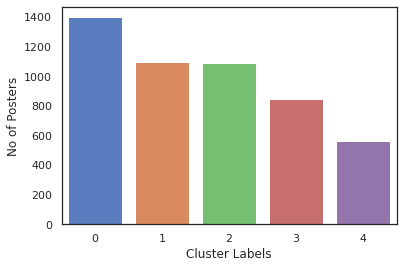

In [40]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")
one.reset_index(inplace=True)
sns.barplot(x="Cluster Labels", y="No of Posters", data=one)


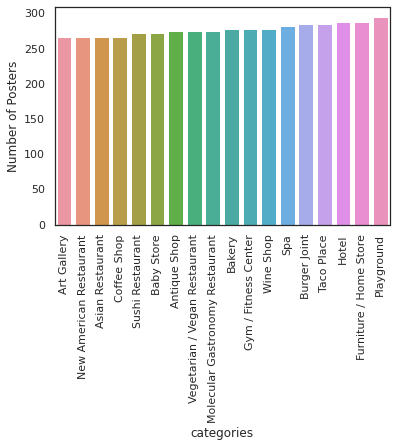

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(style="white", palette="muted")
nearby_venues.sort_values(by=['distribution_posters'],inplace=True)
g=sns.barplot(x="categories", y="distribution_posters", data=nearby_venues)
g.set_xticklabels(labels=nearby_venues['categories'],rotation=90)
plt.ylabel("Number of Posters")
plt.show()



<div class='alert alert-info'>
<h3><center>Final popular places, where the posters needs to be distributed</center></h3>
</div>

In [38]:
# create map
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=14,
    popup='Ecco',
    fill=True,
    color='blue',
    fill_color='blue',
    fill_opacity=0.6
    ).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name'], nearby_venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters